# 1. 데이터프레임 연습
- 데이터프레임 생성
- 행/열 삭제
- na 처리
- apply, replace
- library 설치, 불러오기
- join, concat

In [35]:
import pandas as pd
import numpy as np
df = pd.DataFrame(data=np.array([['OK', 'Perfect', 'Acceptable'], ['Awful','Awful', 'Perfect'], ['Acceptable', 'OK', 'Poor']]), columns=['Student1', 'Student2', 'Student3'])
df.replace(['Awful', 'Poor', 'OK', 'Acceptable', 'Perfect'], [0, 1, 2, 3, 4])


Student1  Student2  Student3
0         2         4         3
1         0         0         4
2         3         2         1

In [36]:
#정규표현식으로 문자열 제거
df = pd.DataFrame(data=np.array([['1\n', 2, '3\n'], [4, 5, '6\n'], [7, '8\n', 9]]))
df.replace({'\n': '<br>'}, regex=True)

0      1      2
0  1<br>      2  3<br>
1      4      5  6<br>
2      7  8<br>      9

In [37]:
#값 변경
df = pd.DataFrame(data=np.array([[1, 2, '+3b'], [4, 5, '-6b'], [7, 8, '+9A']]), columns=['class', 'test', 'result'])
df['result'] = df['result'].map(lambda x: x.lstrip('+-').rstrip('aAbBcC'))


In [38]:
#함수 적용
def doubler(x):
    if x % 2 == 0:
        return x
    else:
        return x * 2

df = pd.DataFrame(data=np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]]), columns=['A', 'B', 'C'])
df['A'].apply(doubler)	# doubler라는 함수를 A열에 적용
doubled_df = df.applymap(doubler)	# `applymap()`는 데이터프레임 전체에 행/열 단위 적용시
print(doubled_df)

    A   B   C
0   2   2   6
1   4  10   6
2  14   8  18


- 그 외 유용한 함수: rename, resample, pct_change, diff

In [39]:
import yfinance as yf

In [40]:
risky_asset = '035420.KS' #ss
market_benchmark = '^KS11'  #KOSPI
start_date = '2022-01-01'
end_date = '2024-06-30'

In [41]:
df = yf.download( [risky_asset, market_benchmark], start=start_date, end = end_date, progress=False)

In [42]:
df.columns

MultiIndex([('Adj Close', '035420.KS'),
            ('Adj Close',     '^KS11'),
            (    'Close', '035420.KS'),
            (    'Close',     '^KS11'),
            (     'High', '035420.KS'),
            (     'High',     '^KS11'),
            (      'Low', '035420.KS'),
            (      'Low',     '^KS11'),
            (     'Open', '035420.KS'),
            (     'Open',     '^KS11'),
            (   'Volume', '035420.KS'),
            (   'Volume',     '^KS11')],
           names=['Price', 'Ticker'])

In [43]:
X = df['Adj Close'].rename(columns={risky_asset: 'asset', market_benchmark: 'market'})
X.resample('M').last()
X.pct_change().dropna()


Ticker         asset    market
Date                          
2022-01-05 -0.028728 -0.011799
2022-01-06 -0.046479 -0.011320
2022-01-07 -0.001477  0.011765
2022-01-10 -0.008876 -0.009533
2022-01-11  0.000000  0.000225
...              ...       ...
2024-06-24  0.007757 -0.007014
2024-06-25 -0.014802  0.003494
2024-06-26  0.012019  0.006365
2024-06-27 -0.017815 -0.002862
2024-06-28  0.009069  0.004942

[609 rows x 2 columns]

- pivot

In [44]:
#피벗
#values: 피벗테이블 정리를 원하는 값
#columns: 피벗의 열
#index: 피벗의 행

products = pd.DataFrame({'category': ['Cleaning', 'Cleaning', 'Entertainment', 'Entertainment', 'Tech', 'Tech'],'store': ['Walmart', 'Dia', 'Walmart', 'Fnac', 'Dia','Walmart'],'price':[11.42, 23.50, 19.99, 15.95, 55.75, 111.55],'testscore': [4, 3, 5, 7, 5, 8]})

pivot_products = products.pivot(index='category', columns='store', values='price')
print(pivot_products)

store            Dia   Fnac  Walmart
category                            
Cleaning       23.50    NaN    11.42
Entertainment    NaN  15.95    19.99
Tech           55.75    NaN   111.55


In [45]:
pivot_products2 = products.pivot_table(index='category', columns='store', values='price', aggfunc='mean')
print(pivot_products2)



store            Dia   Fnac  Walmart
category                            
Cleaning       23.50    NaN    11.42
Entertainment    NaN  15.95    19.99
Tech           55.75    NaN   111.55


In [46]:
#Melting
people = pd.DataFrame({'FirstName' : ['John', 'Jane'],'LastName' : ['Doe', 'Austen'],'BloodType' : ['A-', 'B+'],'Weight' : [90, 64]})
print(pd.melt(people, id_vars=['FirstName', 'LastName'], var_name='measurements'))

  FirstName LastName measurements value
0      John      Doe    BloodType    A-
1      Jane   Austen    BloodType    B+
2      John      Doe       Weight    90
3      Jane   Austen       Weight    64


- 연산

In [47]:
df2 = pd.DataFrame( np.array( [[1,2], [3,4], [5,6]] ))
df1 = pd.DataFrame( [[1,2], [3,4], [5,6]],
                   index=['a', 'b', 'c'],
                   columns= ['c1','c2']  )

df1.index = ['2022-04-28','2022-04-29', '2022-04-30']
df2.index = ['2022-04-26','2022-04-27', '2022-04-28']

df1.columns = ['c1', 'c2']
df2.columns = ['c2', 'c3']

print(df1+df2)

            c1   c2  c3
2022-04-26 NaN  NaN NaN
2022-04-27 NaN  NaN NaN
2022-04-28 NaN  7.0 NaN
2022-04-29 NaN  NaN NaN
2022-04-30 NaN  NaN NaN


- 파일쓰기 및 읽기

In [48]:
df = pd.DataFrame(data=np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]]), columns=['A', 'B', 'C'])

df.to_csv('test.csv', sep='\t', encoding='utf-8')
df.to_excel("test.xlsx")

#한글 파일 중 CP949인코딩
df2 = pd.read_csv("train_df.csv", encoding="CP949")

- groupby, nth, between

In [49]:
import seaborn as sns
diamonds = sns.load_dataset("diamonds")
tips = sns.load_dataset("tips")

In [50]:
diamonds.cut.value_counts()

cut
Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: count, dtype: int64

In [51]:
diamonds.groupby("cut").nth(5)

carat        cut color clarity  depth  table  price     x     y     z
20    0.30       Good     I     SI2   63.3   56.0    351  4.26  4.30  2.71
21    0.23  Very Good     E     VS2   63.8   55.0    352  3.85  3.92  2.48
26    0.24    Premium     I     VS1   62.5   57.0    355  3.97  3.94  2.47
40    0.33      Ideal     I     SI2   61.2   56.0    403  4.49  4.50  2.75
128   0.91       Fair     H     SI2   64.4   57.0   2763  6.11  6.09  3.93

In [52]:
tips.groupby("day").nth(2)

total_bill   tip     sex smoker   day    time  size
2        21.01  3.50    Male     No   Sun  Dinner     3
21       20.29  2.75  Female     No   Sat  Dinner     2
79       17.29  2.71    Male     No  Thur   Lunch     2
92        5.75  1.00  Female    Yes   Fri  Dinner     2

In [53]:
idx = diamonds["price"].between(3500, 3700)#3500이상, 3700이하
diamonds[ idx ]

carat        cut color clarity  depth  table  price     x     y     z
3935   0.90  Very Good     H     SI1   63.3   58.0   3500  6.04  6.13  3.85
3936   0.93       Good     H     VS1   59.1   64.0   3500  6.36  6.27  3.73
3937   0.90      Ideal     G     SI2   62.4   56.0   3500  6.14  6.19  3.85
3938   0.83      Ideal     F     SI1   61.7   57.0   3500  6.04  6.08  3.74
3939   0.90       Fair     H     VS1   65.9   60.0   3500  5.99  5.96  3.94
...     ...        ...   ...     ...    ...    ...    ...   ...   ...   ...
4804   0.90  Very Good     F     SI1   63.8   54.0   3699  6.09  6.13  3.90
4805   0.90  Very Good     F     SI1   63.4   57.0   3699  6.06  6.11  3.86
4806   0.90       Good     F     SI1   58.0   58.0   3699  6.24  6.28  3.63
4807   1.00       Fair     G     SI1   66.1   62.0   3700  6.10  6.03  4.01
4808   1.12  Very Good     G     SI2   63.4   57.0   3700  6.51  6.47  4.12

[784 rows x 10 columns]

In [54]:
diamonds[diamonds["price"].between(3500, 3700, inclusive="neither")].sample(5)
#3500 초과, 3700 미만

carat        cut color clarity  depth  table  price     x     y     z
3965   0.90    Premium     F     SI2   61.5   61.0   3507  6.10  6.06  3.74
4457   1.01       Good     G     SI2   63.8   56.0   3620  6.32  6.22  4.00
4775   1.03      Ideal     G     SI2   60.4   56.0   3692  6.56  6.53  3.95
4275   1.00    Premium     G     SI2   60.2   58.0   3584  6.55  6.48  3.92
3948   0.90  Very Good     I     SI2   61.5   57.0   3503  6.16  6.19  3.80

- 열별 통계량

In [55]:
tips.total_bill.median() #중앙값
tips.total_bill.max()

50.81

- 행열 전환

In [56]:
diabetes = pd.read_csv("diabetes.csv")
diabetes.describe().T.drop("count", axis=1)

mean         std     min       25%       50%  \
Pregnancies                 3.845052    3.369578   0.000   1.00000    3.0000   
Glucose                   120.894531   31.972618   0.000  99.00000  117.0000   
BloodPressure              69.105469   19.355807   0.000  62.00000   72.0000   
SkinThickness              20.536458   15.952218   0.000   0.00000   23.0000   
Insulin                    79.799479  115.244002   0.000   0.00000   30.5000   
BMI                        31.992578    7.884160   0.000  27.30000   32.0000   
DiabetesPedigreeFunction    0.471876    0.331329   0.078   0.24375    0.3725   
Age                        33.240885   11.760232  21.000  24.00000   29.0000   
Outcome                     0.348958    0.476951   0.000   0.00000    0.0000   

                                75%     max  
Pregnancies                 6.00000   17.00  
Glucose                   140.25000  199.00  
BloodPressure              80.00000  122.00  
SkinThickness              32.00000   99.00  
Insulin                   127.25000  846.00  
BMI                        36.60000   67.10  
DiabetesPedigreeFunction    0.62625    2.42  
Age                        41.00000   81.00  
Outcome                     1.00000    1.00

In [57]:
diabetes.describe().T.drop("count", axis=1).style.highlight_max(color="darkred")

In [58]:
diabetes.describe().T.drop("count",axis=1).style.background_gradient( subset=["mean", "50%"], cmap="Reds")

- nlargest, nsmallest, idxmax, idxmin

In [59]:
diamonds.nlargest(5, "price")

carat        cut color clarity  depth  table  price     x     y     z
27749   2.29    Premium     I     VS2   60.8   60.0  18823  8.50  8.47  5.16
27748   2.00  Very Good     G     SI1   63.5   56.0  18818  7.90  7.97  5.04
27747   1.51      Ideal     G      IF   61.7   55.0  18806  7.37  7.41  4.56
27746   2.07      Ideal     G     SI2   62.5   55.0  18804  8.20  8.13  5.11
27745   2.00  Very Good     H     SI1   62.8   57.0  18803  7.95  8.00  5.01

In [60]:
diamonds.nsmallest(5, "price")

carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75

In [61]:
diamonds.price.idxmax() #price 컬럼의 최대값이 있는 행번호..
diamonds.carat.idxmin() # carat 컬럼의 최소값이 있는...

14

#2. SQL + 데이터프레임

- query함수

In [ ]:
data = {"age": [10, 10, 21, 22], "weight": [20, 30, 60, 70]}
df = pd.DataFrame(data)
df

age  weight
0   10      20
1   10      30
2   21      60
3   22      70

In [ ]:
df.query("age == 10") # 특정 값과 같은

age  weight
0   10      20
1   10      30

In [ ]:
df.query("age != 10" )  # 같지 않은

In [ ]:
df.query("age >= 22")

age  weight
3   22      70

In [ ]:
df.query("age in [21, 22]")     # "age == [21, 22]"

age  weight
2   21      60
3   22      70

In [ ]:
df.query("age not in [21, 22]")        #  "age != [21, 22]"

age  weight
0   10      20
1   10      30

In [ ]:
df.query("(age == 10) and (weight >= 30)")                   # and 연산

age  weight
1   10      30

In [ ]:
num_age    = 10
num_weight = 30
df.query("(age == @num_age) and (weight >= @num_weight)")       # @: 외부 변수값 사용

age  weight
1   10      30

In [ ]:
def my_max(x, y):
    return max(x,y)

df.query("age >= @my_max(1,22)") # @ 외부 함수 사용

age  weight
3   22      70

In [ ]:
df.query("index >= 2" )  # index 활용

age  weight
2   21      60
3   22      70

In [ ]:
data = {"name": ["White tiger", "Tiger black", "Red tiger"], "age": [5, 7, 9]}
df = pd.DataFrame(data)

In [ ]:
df.query("name.str.contains('tiger')")               # 문자열 포함

name  age
0  White tiger    5
2    Red tiger    9

In [ ]:
df.query("name.str.startswith('Tiger')")                 # 문자열 시작

name  age
1  Tiger black    7

- Union

In [ ]:
df1 = pd.DataFrame({"age": [10, 10, 21, 22], "weight": [20, 30, 60, 70]}, index=[0,1,2,3])
df2 = pd.DataFrame({"age": [10, 10, 21, 22], "weight": [20, 30, 60, 70]}, index=['a','b','c','d'])

In [ ]:
pd.concat([df1, df2], ignore_index=True).drop_duplicates()    #행으로 결합

age  weight
0   10      20
1   10      30
2   21      60
3   22      70

In [ ]:
df1 = pd.DataFrame({"age": [10, 10, 21, 22], "weight": [20, 30, 60, 70]}, index=[0,1,2,3])
df2 = pd.DataFrame({"score": [30, 30, 41, 42], "weight": [20, 30, 60, 70]}, index=['a','b','c','d'])

In [ ]:
pd.concat([df1, df2], ignore_index=True).drop_duplicates()    #행으로 결합

age  weight  score
0  10.0      20    NaN
1  10.0      30    NaN
2  21.0      60    NaN
3  22.0      70    NaN
4   NaN      20   30.0
5   NaN      30   30.0
6   NaN      60   41.0
7   NaN      70   42.0

In [ ]:
pd.concat([df1, df2], ignore_index=True, axis=1).drop_duplicates()    #열 결합
pd.concat([df1, df2], ignore_index=True, axis=1, join="inner").drop_duplicates()    #열 결합

Empty DataFrame
Columns: [0, 1, 2, 3]
Index: []

- pandasql

In [ ]:
!pip install pandasql

  Preparing metadata (setup.py) ... done
  Created wheel for pandasql: filename=pandasql-0.7.3-py3-none-any.whl size=26771 sha256=6422b73072ec311d5115dfb77ef28459aa08e58b01a96f12d0b48a9ab8eb4f1b
  Stored in directory: /root/.cache/pip/wheels/e9/bc/3a/8434bdcccf5779e72894a9b24fecbdcaf97940607eaf4bcdf9
Successfully built pandasql


In [ ]:
from pandasql import sqldf
penguins = sns.load_dataset('penguins')
print(penguins.head())

  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
3          NaN     NaN  
4       3450.0  Female  


In [ ]:
sqldf("SELECT species, island FROM penguins LIMIT 5")

species     island
0  Adelie  Torgersen
1  Adelie  Torgersen
2  Adelie  Torgersen
3  Adelie  Torgersen
4  Adelie  Torgersen

In [ ]:
sqldf('''SELECT DISTINCT species
                 FROM penguins''')

species
0     Adelie
1  Chinstrap
2     Gentoo

In [ ]:
sqldf('''SELECT body_mass_g
                 FROM penguins
                ORDER BY body_mass_g DESC
                LIMIT 5''')

body_mass_g
0       6300.0
1       6050.0
2       6000.0
3       6000.0
4       5950.0

In [ ]:
sqldf('''SELECT DISTINCT species
                 FROM penguins
                WHERE sex = 'Male'
                  AND flipper_length_mm > 210''')

species
0  Chinstrap
1     Gentoo

In [ ]:
sqldf('''SELECT species, MAX(bill_length_mm)
                 FROM penguins
                GROUP BY species''')

species  MAX(bill_length_mm)
0     Adelie                 46.0
1  Chinstrap                 58.0
2     Gentoo                 59.6

In [ ]:
print(penguins[['species', 'bill_length_mm']].groupby('species', as_index=False).max())

     species  bill_length_mm
0     Adelie            46.0
1  Chinstrap            58.0
2     Gentoo            59.6


In [ ]:
sqldf('''SELECT bill_length_mm / bill_depth_mm AS length_to_depth
                 FROM penguins
                ORDER BY length_to_depth DESC
                LIMIT 5''')

length_to_depth
0         3.612676
1         3.510490
2         3.505882
3         3.492424
4         3.458599

- with, union

In [ ]:
sqldf('''
with temp1 as (
  SELECT species, MAX(bill_length_mm) as b
                 FROM penguins
                GROUP BY species
)
select * from temp1 where b>50
''')

species     b
0  Chinstrap  58.0
1     Gentoo  59.6

In [ ]:
sqldf('''

select * from penguins where species == 'Adeli'
union all
select * from penguins where species == 'Chinstrap'
union all
select * from penguins where species == 'Gentoo'

''')

species  island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0    Chinstrap   Dream            46.5           17.9              192.0   
1    Chinstrap   Dream            50.0           19.5              196.0   
2    Chinstrap   Dream            51.3           19.2              193.0   
3    Chinstrap   Dream            45.4           18.7              188.0   
4    Chinstrap   Dream            52.7           19.8              197.0   
..         ...     ...             ...            ...                ...   
187     Gentoo  Biscoe             NaN            NaN                NaN   
188     Gentoo  Biscoe            46.8           14.3              215.0   
189     Gentoo  Biscoe            50.4           15.7              222.0   
190     Gentoo  Biscoe            45.2           14.8              212.0   
191     Gentoo  Biscoe            49.9           16.1              213.0   

     body_mass_g     sex  
0         3500.0  Female  
1         3900.0    Male  
2         3650.0    Male  
3         3525.0  Female  
4         3725.0    Male  
..           ...     ...  
187          NaN    None  
188       4850.0  Female  
189       5750.0    Male  
190       5200.0  Female  
191       5400.0    Male  

[192 rows x 7 columns]

# 3. Exploratory Data Analysis

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [62]:
boston = pd.read_csv("BostonHousing.csv")
boston.columns
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


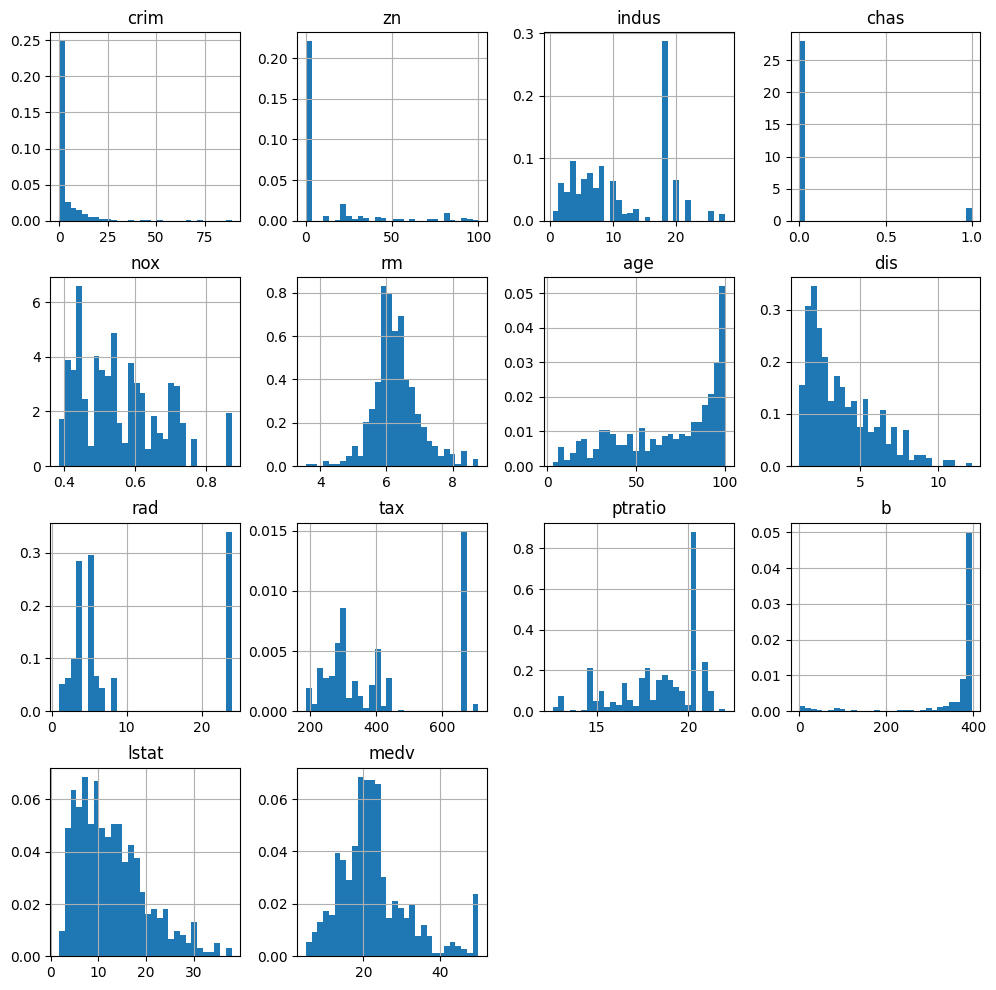

In [64]:
boston.hist(bins=30, figsize=(12,12), density=True)
plt.show()

Text(0.5, 1.0, 'Boxplot')

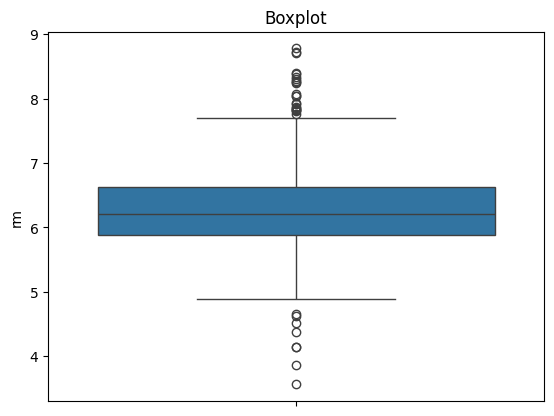

In [65]:
#sns를 활용한 Box plot
boston = pd.read_csv("BostonHousing.csv")[['rm', 'lstat', 'crim']]

sns.boxplot(y=boston['rm'])
plt.title('Boxplot')

In [66]:
#outlier 제거하기
#boxplot의 IQR(Q3-Q1)의 1.5배를 넘는 값들을 제거
def find_boundaries(df, variable, distance):
	IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)
	lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
	upper_boundary = df[variable].quantile(0.75) + (IQR * distance)
	return upper_boundary, lower_boundary

upper_boundary, lower_boundary = find_boundaries(boston, 'rm', 1.5)
upper_boundary, lower_boundary

(7.730500000000001, 4.778499999999999)

- np.where 활용

In [67]:
a=np.array( [ 2,3,4,5])
print( a > 3 )
np.where( a>3, "A" ,  "B" )
~(a>3)

[False False  True  True]


array([ True,  True, False, False])

In [68]:
outliers = np.where(boston['rm'] > upper_boundary, True,
                    np.where(boston['rm'] < lower_boundary, True, False)
                    )
~outliers
boston['rm'][~outliers]  #outlier만 출력, T,F로 해당 위치의 값을 선택...

0      6.575
1      6.421
2      7.185
3      6.998
4      7.147
       ...  
501    6.593
502    6.120
503    6.976
504    6.794
505    6.030
Name: rm, Length: 476, dtype: float64

In [69]:
outliers_df = boston.loc[outliers, 'rm']  #iloc는 정수값...
outliers_df.head()

#outlier 실제로 제거해보기
boston.loc[~outliers, 'rm']

0      6.575
1      6.421
2      7.185
3      6.998
4      7.147
       ...  
501    6.593
502    6.120
503    6.976
504    6.794
505    6.030
Name: rm, Length: 476, dtype: float64

In [70]:
#crim 변수에서 중앙값보다 크거나, q1보다 작은 값들만 선택하세요
#np.where를 이용하세요
q1 = boston.crim.quantile(0.25)  #Q1
q2 = boston.crim.quantile(0.5)  #Q2, 중앙값
abc = np.where( boston.crim > q2  , True   ,
         np.where( boston.crim < q1, True, False )
         )

boston.crim[abc]
boston.loc[ abc, "crim"]


0      0.00632
1      0.02731
2      0.02729
3      0.03237
4      0.06905
        ...   
497    0.26838
501    0.06263
502    0.04527
503    0.06076
505    0.04741
Name: crim, Length: 380, dtype: float64

- 시각화로 탐색

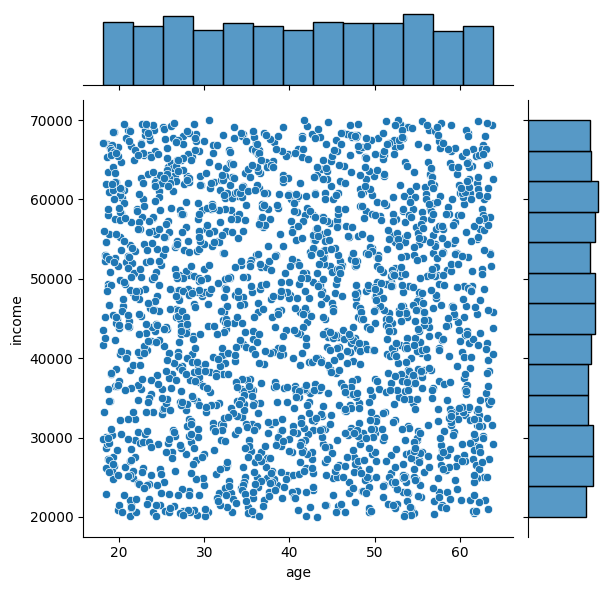

In [71]:
data = pd.read_csv("creditset2.csv")
join1 = sns.jointplot(x="age", y="income", data=data);
join1.savefig("join1.png")

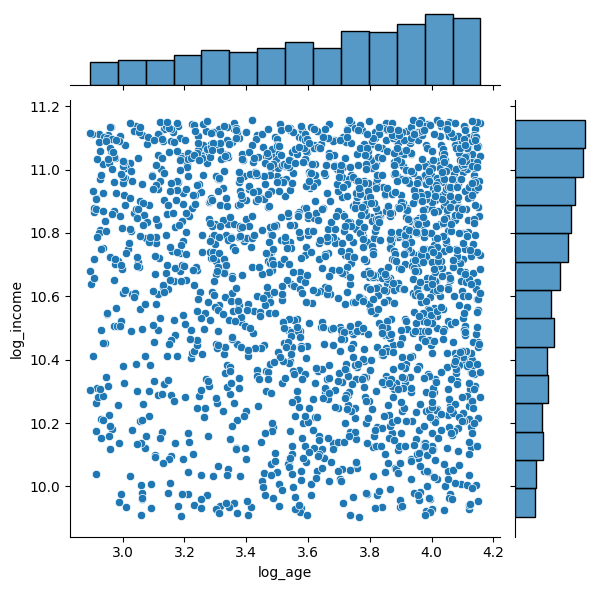

In [72]:
data["log_age"] = np.log( data.age )
data["log_income"] =np.log( data.income)

join1 = sns.jointplot(x="log_age", y="log_income", data=data);
join1.savefig("join1_log.jpg")

In [73]:
#tips 예제 데이터로 연습
tips = sns.load_dataset('tips')
sns.set_style("whitegrid")
tips.head()

total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

<Axes: >

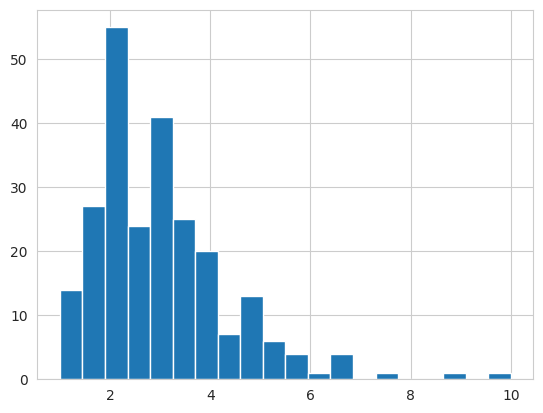

In [74]:
#tips 자료에서 total_bill, tip 사이의 corr를 구하고, p-value 확인
from scipy import stats
stats.pearsonr( tips.total_bill, tips.tip)
#요일별 빈도 체크
tips.day.value_counts()
#tip에 대한 histogram
tips.tip.hist( bins = 20 )

- tips 데이터에서, time별로 total_bill의 박스플랏
- 각 boxplot은 성별로 나눠서 표현 (hue를 지정)

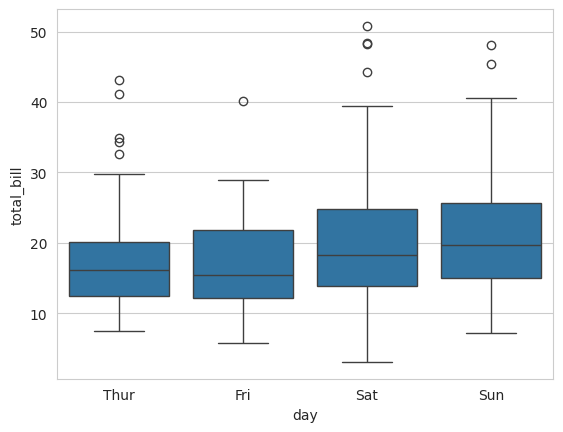

In [75]:
#box plot
sns.boxplot(x="day", y="total_bill", data=tips)
plt.show()

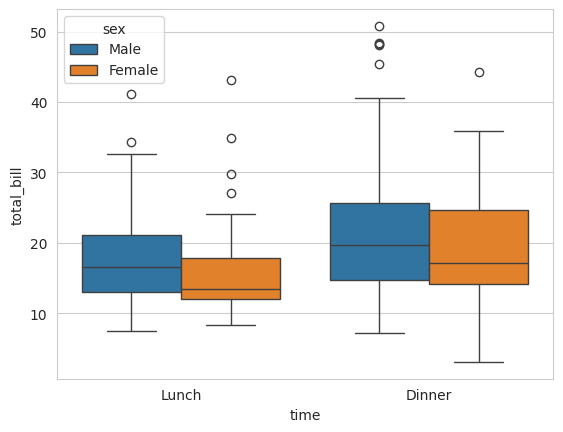

In [76]:
#box plot
sns.boxplot(x="time", y="total_bill", hue="sex", data=tips)
plt.show()

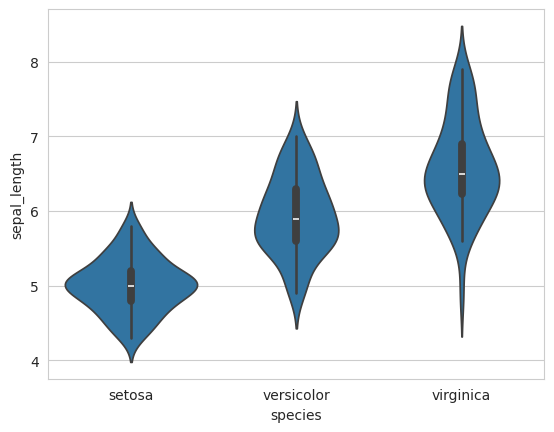

In [77]:
#violin plot
iris = sns.load_dataset("iris")
sns.violinplot(x=iris.species, y=iris.sepal_length, data=iris);
plt.savefig("violin.png")

In [78]:
#pivot+Heatmap
#pivot
df1 = pd.DataFrame( {'x':['A','B', 'C', 'D', 'E', 'F'], 'y':[2021,2021,2021,2022,2022,2022], 'z':[1,2,3,4,5,6]})
df1
df1.pivot(index='x',columns='y', values='z').fillna(0) #index 중복 없어야 함.

y  2021  2022
x            
A   1.0   0.0
B   2.0   0.0
C   3.0   0.0
D   0.0   4.0
E   0.0   5.0
F   0.0   6.0

In [79]:
flights = sns.load_dataset("flights")
flights.head()

year month  passengers
0  1949   Jan         112
1  1949   Feb         118
2  1949   Mar         132
3  1949   Apr         129
4  1949   May         121

In [82]:
df = flights.pivot(index='month', columns='year', values='passengers') #행, 열 지정, 값 지정
df.head()

year   1949  1950  1951  1952  1953  1954  1955  1956  1957  1958  1959  1960
month                                                                        
Jan     112   115   145   171   196   204   242   284   315   340   360   417
Feb     118   126   150   180   196   188   233   277   301   318   342   391
Mar     132   141   178   193   236   235   267   317   356   362   406   419
Apr     129   135   163   181   235   227   269   313   348   348   396   461
May     121   125   172   183   229   234   270   318   355   363   420   472

<Axes: xlabel='year', ylabel='month'>

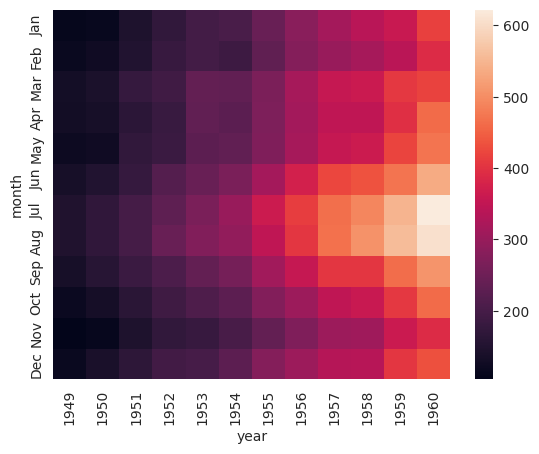

In [83]:
sns.heatmap(df)

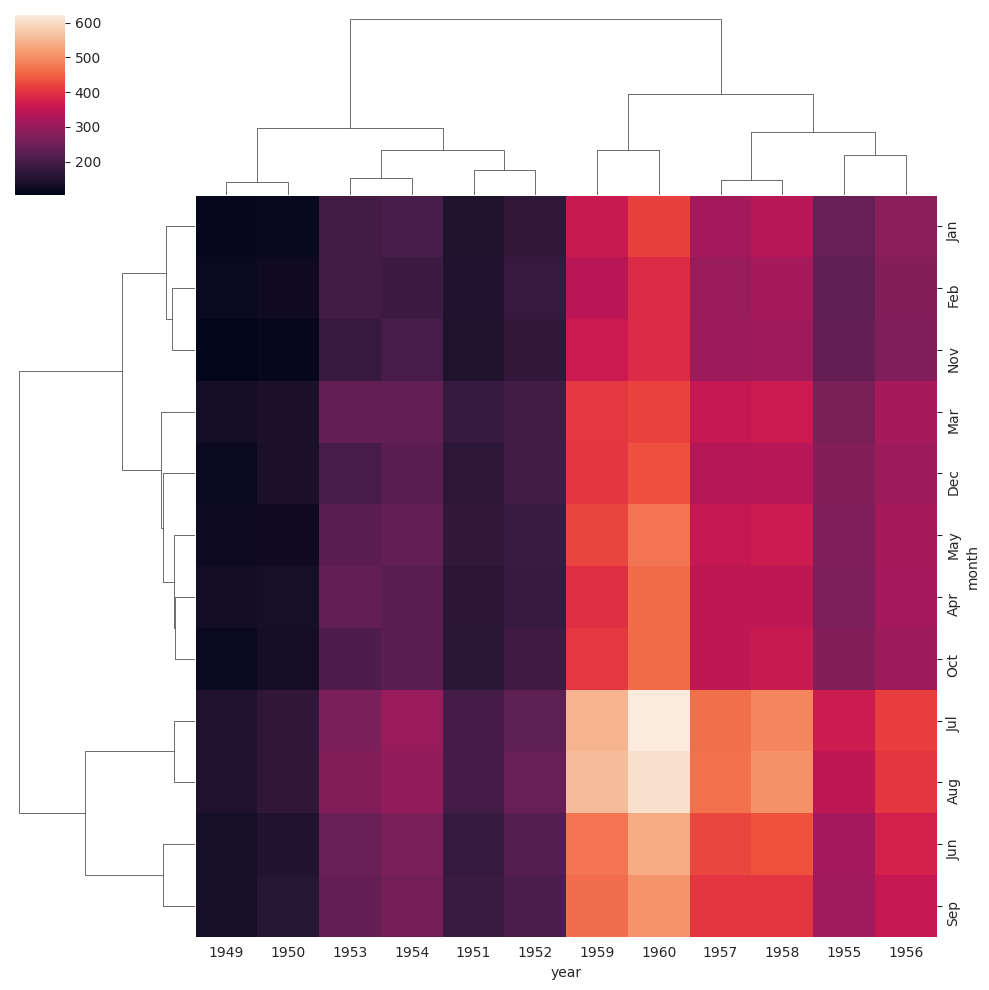

In [84]:
sns.clustermap(df)

- pairplot

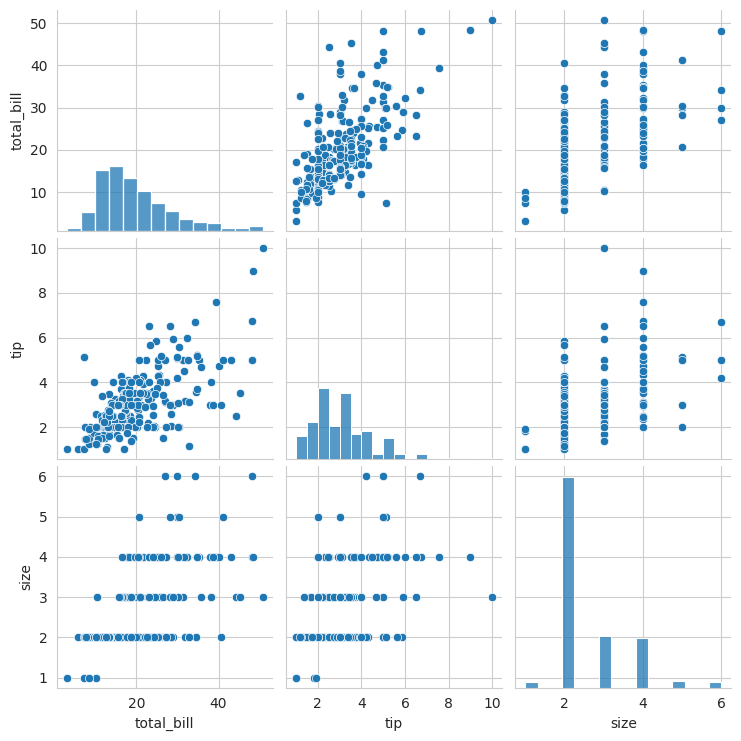

In [85]:
sns.pairplot(tips)